<a href="https://colab.research.google.com/github/kumarakhansa/AITF_2026/blob/main/07_KONSTRUKSI_DAN_DOKUMENTASI/konstruksi_dan_dokumentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **2. Load Dataset**

In [13]:
# Memuat dataset Titanic dari library seaborn
df = sns.load_dataset('titanic')

# Menampilkan lima baris pertama dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **3. Data Understanding**

In [14]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
print("Dimensi dataset:", df.shape)

# Menampilkan struktur data, tipe data, dan jumlah nilai non-null
df.info()

Dimensi dataset: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
# Menampilkan statistik deskriptif untuk seluruh kolom
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **4. Data Quality Assessment**

In [16]:
# Mengecek jumlah nilai hilang pada setiap kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [17]:
# Mengecek jumlah baris duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 107


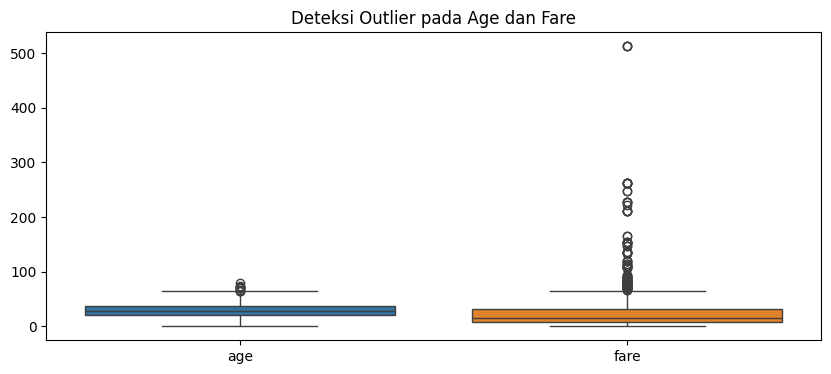

In [18]:
# Visualisasi outlier pada fitur numerik utama
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['age', 'fare']])
plt.title("Deteksi Outlier pada Age dan Fare")
plt.show()

# **5. Data Cleaning**

In [19]:
# Menghapus kolom deck karena memiliki terlalu banyak missing value
df = df.drop(columns=['deck'])

# Imputasi missing value
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Menghapus data duplikat
df = df.drop_duplicates()

# Verifikasi ulang
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# **6. Data Preprocessing**

## **6.1 Feature Engineering**

In [20]:
# Membuat fitur kelompok usia
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 12, 18, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)

# Membuat fitur ukuran keluarga
df['family_size'] = df['sibsp'] + df['parch'] + 1

## **6.2 Encoding Data Kategorik**

In [21]:
# Kolom kategorik yang akan diencoding
categorical_cols = ['sex', 'embark_town', 'class', 'age_group']

# Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

## **6.3 Scaling Data Numerik**

In [22]:
# Standardisasi fitur numerik
scaler = StandardScaler()

numerical_cols = ['age', 'fare', 'family_size']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# **7. Data Labeling**

In [23]:
# Menggunakan label asli 'survived'
# Menambahkan label baru berdasarkan fare (risk level)
df['risk_level'] = pd.cut(
    df['fare'],
    bins=[-np.inf, -0.5, 0.5, np.inf],
    labels=['Low', 'Medium', 'High']
)

# **8. Label Distribution Analysis**

In [24]:
# Distribusi label survived
print("Distribusi label Survived:")
print(df['survived'].value_counts())

# Distribusi label risk_level
print("\nDistribusi label Risk Level:")
print(df['risk_level'].value_counts())

Distribusi label Survived:
survived
0    455
1    320
Name: count, dtype: int64

Distribusi label Risk Level:
risk_level
Medium    426
Low       233
High      116
Name: count, dtype: int64


# **9. Data Visualization**

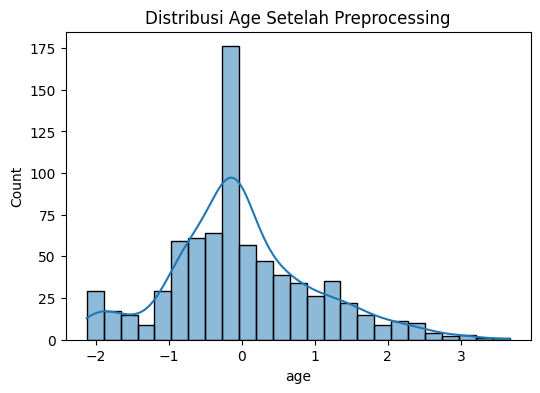

In [25]:
# Visualisasi distribusi usia setelah preprocessing
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True)
plt.title("Distribusi Age Setelah Preprocessing")
plt.show()

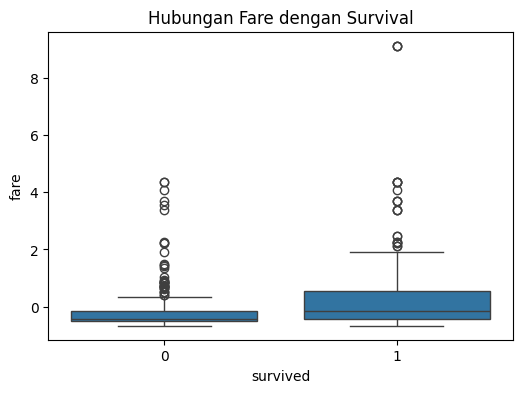

In [26]:
# Visualisasi hubungan fare dengan survival
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Hubungan Fare dengan Survival")
plt.show()

# **10. Evaluation and Documentation**

In [28]:
# Menampilkan struktur akhir dataset
df.info()

# Menampilkan contoh data akhir
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    int64   
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    int64   
 5   parch        775 non-null    int64   
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    object  
 8   class        775 non-null    int64   
 9   who          775 non-null    object  
 10  adult_male   775 non-null    bool    
 11  embark_town  775 non-null    int64   
 12  alive        775 non-null    object  
 13  alone        775 non-null    bool    
 14  age_group    775 non-null    int64   
 15  family_size  775 non-null    float64 
 16  risk_level   775 non-null    category
dtypes: bool(2), category(1), float64(3), int64(8), object(3)
memory usage: 93.2+ K

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group,family_size,risk_level
0,0,3,1,-0.551060,1,0,-0.527515,S,2,man,True,2,no,False,0,0.033066,Low
1,1,1,0,0.611945,1,0,0.695086,C,0,woman,False,0,yes,False,0,0.033066,High
2,1,3,0,-0.260308,0,0,-0.514627,S,2,woman,False,2,yes,True,0,-0.624008,Low
3,1,1,0,0.393881,1,0,0.347909,S,0,woman,False,2,yes,False,0,0.033066,Medium
4,0,3,1,0.393881,0,0,-0.512240,S,2,man,True,2,no,True,0,-0.624008,Low
